In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
# read csv
df = pd.read_csv(r'https://raw.githubusercontent.com/koen-d-r/datacamp_time_series_analysis_with_google_trends_data/master/multiTimeline.csv',  skiprows = 2, parse_dates = ['Month'], index_col = 0)

In [3]:
# rename columns
df.rename({'diet: (Worldwide)':'diet', 'gym: (Worldwide)':'gym', 'finance: (Worldwide)':'finance'}, axis=1, inplace=True)

In [4]:
# check data
df.head()

,diet,gym,finance
Month,,,
2004-01-01,100,31,48
2004-02-01,76,27,50
2004-03-01,70,25,47
2004-04-01,69,23,47
2004-05-01,74,23,43


In [5]:
# check data 2
df.describe()

,diet,gym,finance
count,187.000000,187.000000,187.000000
mean,50.374332,36.721925,47.561497
std,7.934475,9.214744,4.724702
min,36.000000,23.000000,39.000000
25%,45.000000,29.000000,45.000000
50%,49.000000,35.000000,47.000000
75%,54.000000,45.000000,49.000000
max,100.000000,60.000000,73.000000


In [6]:
# check for empty fields
df.isnull().sum()

diet       0
gym        0
finance    0
dtype: int64

/Users/melissabracamonte/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


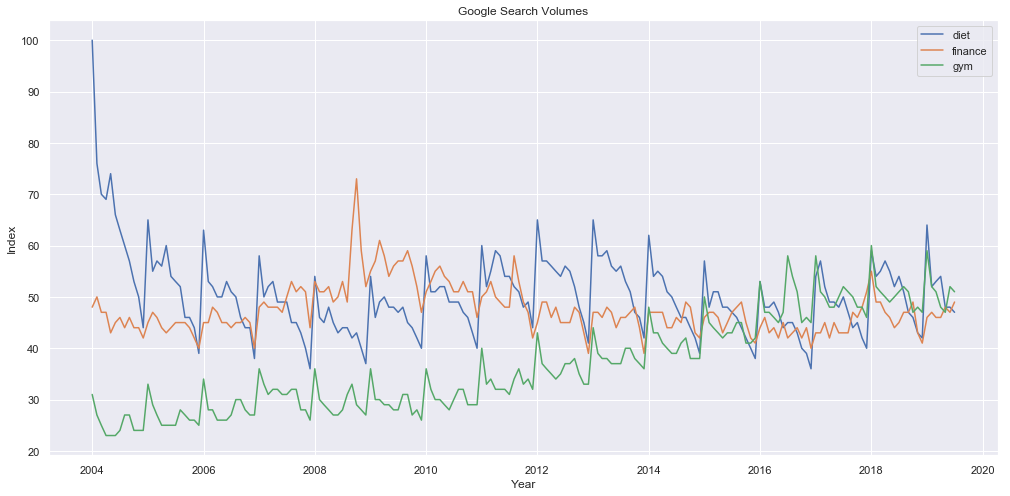

In [7]:
# visualize data
plt.figure(figsize = (17,8))
plt.plot(df.index, df['diet'], label = 'diet')
plt.plot(df.index, df['finance'], label = 'finance')
plt.plot(df.index, df['gym'], label = 'gym')
plt.xlabel('Year')
plt.ylabel('Index')
plt.title('Google Search Volumes')
plt.legend()
plt.show()

In [8]:
# check correlations between columns. Notice the negative correlation between 'gym' and 'diet'
df.corr()

,diet,gym,finance
diet,1.000000,-0.037541,-0.012808
gym,-0.037541,1.000000,-0.255228
finance,-0.012808,-0.255228,1.000000


In [9]:
# remove seasonality with rolling mean
rol_mean = df.rolling(12).mean()

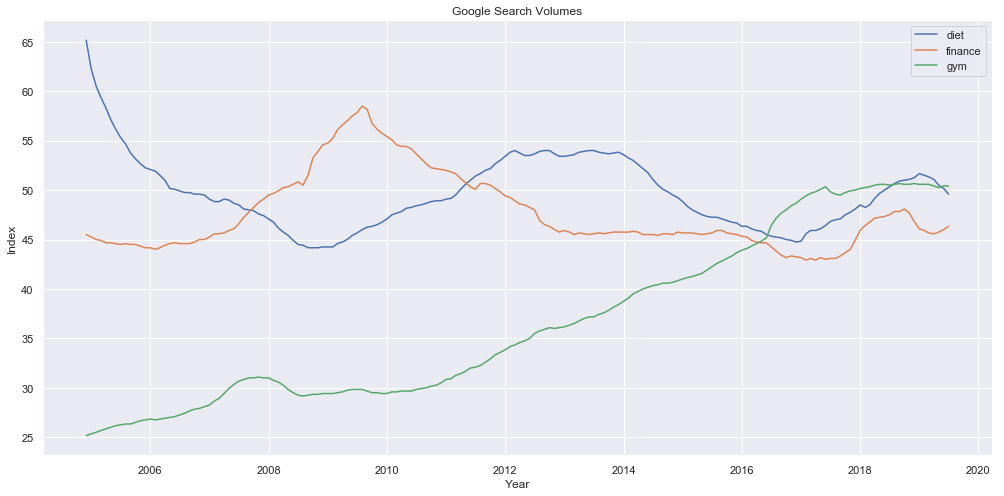

In [10]:
# plot rolling means
plt.figure(figsize = (17,8))
plt.plot(rol_mean.index, rol_mean['diet'], label = 'diet')
plt.plot(rol_mean.index, rol_mean['finance'], label = 'finance')
plt.plot(rol_mean.index, rol_mean['gym'], label = 'gym')
plt.xlabel('Year')
plt.ylabel('Index')
plt.title('Google Search Volumes')
plt.legend()
plt.show()

In [11]:
# remove trend with diff() method
df_diff = df.diff()

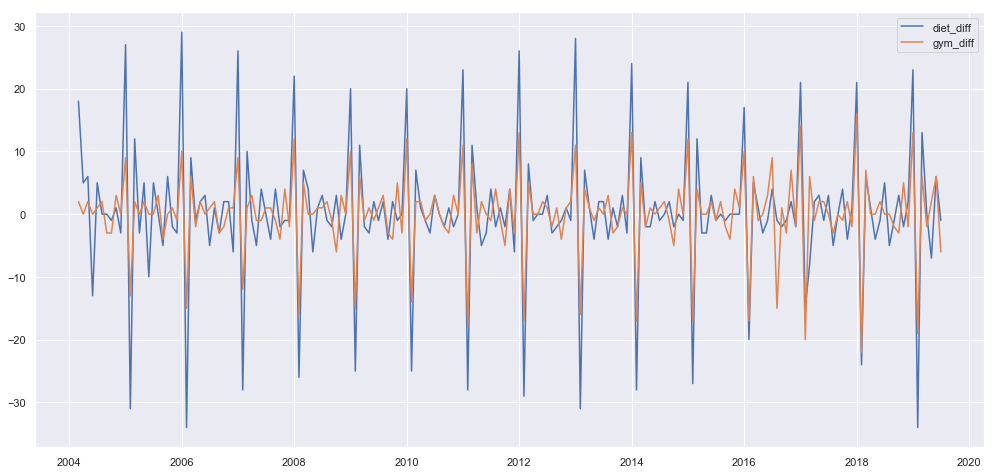

In [12]:
# plot diff() data for keywords 'gym' and 'diet'
plt.figure(figsize = (17,8))
plt.plot(df_diff['diet'].diff(), label = 'diet_diff')
plt.plot(df_diff['gym'].diff(), label = 'gym_diff')
plt.legend()
plt.show()

In [15]:
# recheck correalations. Notice that there is an good correlation (0.82) between 'gym' and 'diet' as soon as trend 
# is removed!
df_diff_corr = df_diff.corr()
df_diff_corr

,diet,gym,finance
diet,1.000000,0.816452,0.387677
gym,0.816452,1.000000,0.364922
finance,0.387677,0.364922,1.000000


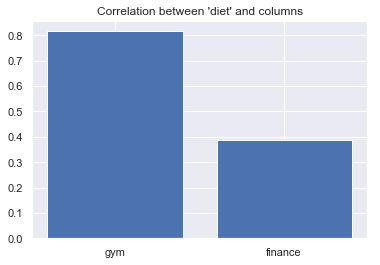

In [16]:
# visualize correlations
plt.bar(df_diff_corr['diet'].iloc[1:].index, df_diff_corr['diet'].iloc[1:].values)
plt.title("Correlation between 'diet' and columns")
plt.show()

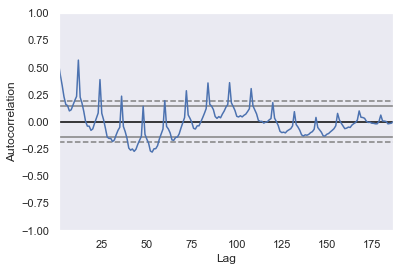

In [17]:
diet = df[['diet']]
pd.plotting.autocorrelation_plot(diet)